In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading from csv file
main_df = pd.read_csv('deliveries.csv')

In [3]:
# filtering the dataframe into instances where 'Dhoni' was the batsman
dhoni_filt = (main_df['batsman'].str.contains('Dhoni'))
dhoni_df = main_df.loc[dhoni_filt]

In [4]:
# calculating strike rate phase-wise
# over 0 - 5
phase1_filt = (dhoni_df['over'] <= 5)
phase1_runs = dhoni_df.loc[phase1_filt, 'batsman_runs'].sum()
phase1_balls = dhoni_df.loc[phase1_filt, 'ball'].count()
sr1 = (phase1_runs/phase1_balls)*100
# over 6- 10
phase2_filt = (dhoni_df['over'] <= 10) & (dhoni_df['over'] > 5)
phase2_runs = dhoni_df.loc[phase2_filt, 'batsman_runs'].sum()
phase2_balls = dhoni_df.loc[phase2_filt, 'ball'].count()
sr2 = (phase2_runs/phase2_balls)*100
# over 11 - 15
phase3_filt = (dhoni_df['over'] <= 15) & (dhoni_df['over'] > 10)
phase3_runs = dhoni_df.loc[phase3_filt, 'batsman_runs'].sum()
phase3_balls = dhoni_df.loc[phase3_filt, 'ball'].count()
sr3 = (phase3_runs/phase3_balls)*100
# over 16 - 20
phase4_filt = (dhoni_df['over'] <= 20) & (dhoni_df['over'] > 15)
phase4_runs = dhoni_df.loc[phase4_filt, 'batsman_runs'].sum()
phase4_balls = dhoni_df.loc[phase4_filt, 'ball'].count()
sr4 = (phase4_runs/phase4_balls)*100

In [5]:
# processing the strikerate data for plotting
d = {'over': ['0-5', '6-10', '11-15', '16-20', '0-5', '6-10', '11-15', '16-20'], 'Balls': ['runs', 'runs', 'runs', 'runs', 'balls', 'balls', 'balls', 'balls'], 'Runs':[phase1_runs, phase2_runs, phase3_runs, phase4_runs, phase1_balls, phase2_balls, phase3_balls, phase4_balls]}

sr = {'over': ['0-5', '6-10', '11-15', '16-20'], 'Strike Rate':[sr1, sr2, sr3, sr4]}

sr_df = pd.DataFrame(data=sr)
phase_df = pd.DataFrame(data=d)

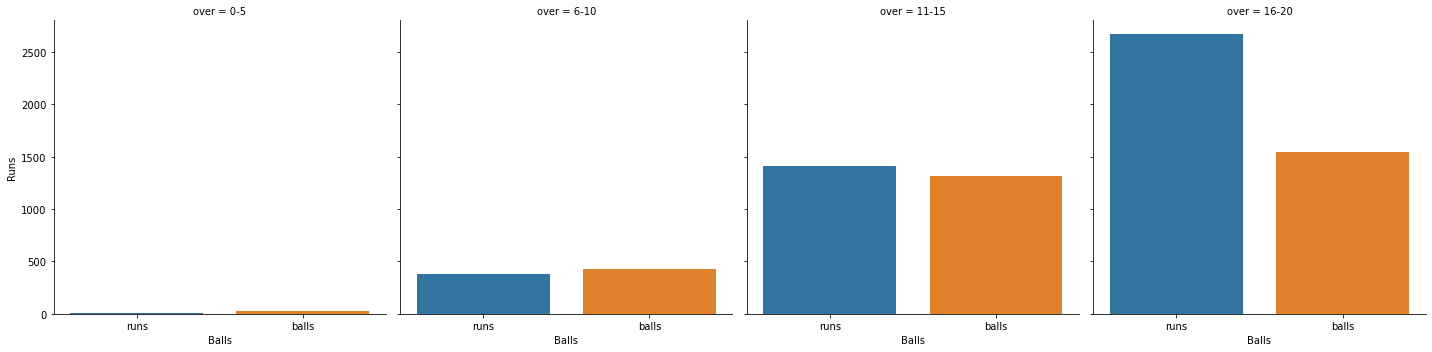

In [6]:
sns.factorplot("Balls", "Runs", col="over", data=phase_df, kind="bar")

In [8]:
sr_df

,over,Strike Rate
0,0-5,45.833333
1,6-10,89.695550
2,11-15,107.202426
3,16-20,172.416021


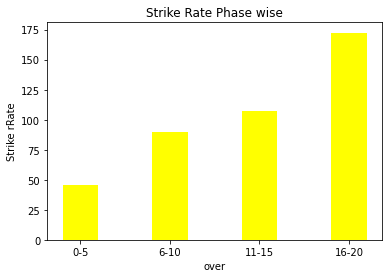

In [190]:
# creating the bar plot 
plt.bar(['0-5','6-10','11-15','16-20'], sr_df['Strike Rate'], color ='yellow',  
        width = 0.4) 
  
plt.xlabel("over") 
plt.ylabel("Strike rRate") 
plt.title("Strike Rate Phase wise") 
plt.show() 

In [10]:
#fraction of runs w.r.t score
runs_series = dhoni_df['batsman_runs'].value_counts(normalize = True) 
runs_series = runs_series.drop(labels=[7])

In [11]:
# Searching
dhoni_df['batsman_runs'].where(dhoni_df['batsman_runs'] == 6)

469      NaN
473      NaN
478      NaN
479      NaN
482      NaN
          ..
179024   NaN
179025   NaN
179026   NaN
179027   NaN
179029   NaN
Name: batsman_runs, Length: 3318, dtype: float64

In [12]:
run_array = pd.Series([1,0,2,4,6,3], name='run_category')
run_array

0    1
1    0
2    2
3    4
4    6
5    3
Name: run_category, dtype: int64

In [13]:
# Creating a dataframe for various scores possible in a single ball
runs_classify_df = pd.concat([run_array, runs_series], axis='columns', sort=False)

In [14]:
runs_classify_df

,run_category,batsman_runs
0,1.0,0.334840
1,0.0,0.416817
2,2.0,0.091621
3,4.0,0.004219
4,6.0,0.089512
5,3.0,NaN
6,NaN,0.062387


In [15]:
runs_classify_df.at[5, 'batsman_runs'] = 0.004219
runs_classify_df.at[6, 'run_category'] = 6.0

In [16]:
# Calculating percentage from fraction
for i in runs_classify_df.index:
    runs_classify_df.at[i, 'batsman_runs'] = runs_classify_df.at[i, 'batsman_runs']*100

In [17]:
runs_classify_df

,run_category,batsman_runs
0,1.0,33.484027
1,0.0,41.681736
2,2.0,9.162146
3,4.0,0.421941
4,6.0,8.951175
5,3.0,0.421900
6,6.0,6.238698


In [20]:
# Returns array of unique values
bowler_array = dhoni_df['bowler'].unique() 

In [26]:
# converting fraction of runs to percentage
for index, value in runs_series.items():
    runs_series[index] = value*100

In [64]:
runs_series#

1    41.681736
0    33.484027
2     9.162146
4     8.951175
6     6.238698
3     0.421941
Name: batsman_runs, dtype: float64

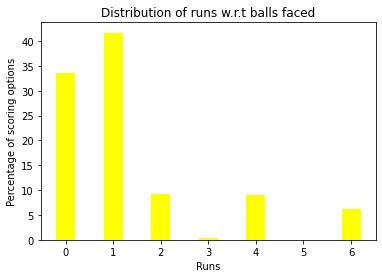

In [29]:
# Plotting the score distribution
plt.bar(run_array, runs_series, color ='yellow',  
        width = 0.4) 
  
plt.xlabel("Runs") 
plt.ylabel("Percentage of scoring options") 
plt.title("Distribution of runs w.r.t balls faced") 
plt.show() 

In [32]:
# creating the list of spinners
spinners = ['SB Jakati','S Nadeem','A Mishra','RA Jadeja','P Negi','S Badree','YS Chahal','Rashid Khan','Harbhajan Singh','SP Narine','PP Chawla','Kuldeep Yadav','KH Pandya','Mohammad Hafeez','M Kartik','V Sehwag','SK Warne','Shahid Afridi','PP Ojha','Shoaib Malik','Shoaib Malik','Yuvraj Singh','A Kumble','YK Pathan','ST Jayasuriya','KP Pietersen','DL Vettori','RG Sharma','Y Venugopal Rao','RE van der Merwe','DJ Hussey','BAW Mendis','Iqbal Abdulla','S Ladda','R Sharma','J Botha','M Muralitharan','CH Gayle','Ankit Sharma','MN Samuels','RJ Peterson','Shakib Al Hasan','PV Tambe','AR Patel','Parvez Rasool','JP Duminy','Imran Tahir','GB Hogg','DJ Hooda','T Shamsi','S Kaushik','Gurkeerat Singh', 'M Markande', 'R Ashwin','M Ur Rahman', 'S Gopal','I Sodhi','S Lamichhane', 'GJ Maxwell','K Gowtham', 'RD Chahar']

In [30]:
# creating an array of all the bowlers Dhoni has faced ever
bowler_array = dhoni_df['bowler'].unique() # Returns array of unique values

In [31]:
bowler_array

array(['HH Pandya', 'JJ Bumrah', 'MJ McClenaghan', 'KA Pollard',
       'MP Stoinis', 'Swapnil Singh', 'S Nadeem', 'PJ Cummins',
       'CJ Anderson', 'A Mishra', 'AJ Tye', 'SB Jakati', 'RA Jadeja',
       'P Negi', 'S Badree', 'SR Watson', 'YS Chahal', 'S Aravind',
       'Rashid Khan', 'MC Henriques', 'Mohammed Siraj', 'S Kaul',
       'B Kumar', 'Harbhajan Singh', 'MG Johnson', 'SP Narine',
       'PP Chawla', 'Kuldeep Yadav', 'AF Milne', 'Ankit Soni', 'DR Smith',
       'JP Faulkner', 'Basil Thampi', 'UT Yadav', 'KV Sharma',
       'KH Pandya', 'SL Malinga', 'IK Pathan', 'JR Hopes', 'DJ Bravo',
       'MA Khote', 'DS Kulkarni', 'A Nehra', 'AB Agarkar',
       'Mohammad Hafeez', 'M Kartik', 'LR Shukla', 'I Sharma', 'B Akhil',
       'JH Kallis', 'DW Steyn', 'P Kumar', 'Z Khan', 'V Sehwag',
       'Mohammad Asif', 'GD McGrath', 'VY Mahesh', 'PJ Sangwan',
       'MM Patel', 'SK Warne', 'Shahid Afridi', 'SB Styris', 'SB Bangar',
       'PP Ojha', 'Shoaib Malik', 'VRV Singh', 'Yuvraj Si

In [41]:
#creating a list of all the pacers Dhoni has faced in his life
pacers = [bowler for bowler in bowler_array if bowler not in spinners]

In [51]:
# Getting a dataframe involving spinner only
spinners_filt = dhoni_df['bowler'].isin(spinners)
dhoni_spin = dhoni_df.loc[spinners_filt]

In [57]:
run_against_spin = dhoni_spin['batsman_runs'].sum()
balls_against_spin = dhoni_spin['ball'].count()

In [59]:
strike_rate_against_spin = run_against_spin/balls_against_spin*100

In [61]:
# Getting a dataframe involving pacers only
pacers_filt = dhoni_df['bowler'].isin(pacers)
dhoni_pace = dhoni_df.loc[pacers_filt]
runs_against_pace = dhoni_pace['batsman_runs'].sum()
balls_against_pace = dhoni_pace['ball'].count()
strike_rate_against_pace = runs_against_pace/balls_against_pace*100

In [67]:
dhoni_spin_dist = dhoni_spin['batsman_runs'].value_counts(normalize = True)

In [80]:
for index, value in dhoni_spin_dist.items():
    dhoni_spin_dist[index] = value*100
spin_array = np.array([1,0,2,6,4,3])

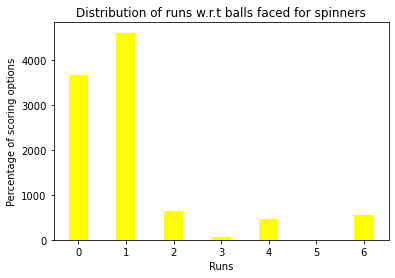

In [81]:
# creating the bar plot for distribution of scores w.r.t spinners
plt.bar(spin_array, dhoni_spin_dist, color ='yellow',  
        width = 0.4) 
  
plt.xlabel("Runs") 
plt.ylabel("Percentage of scoring options") 
plt.title("Distribution of runs w.r.t balls faced for spinners") 
plt.show() 

In [90]:
dhoni_pace_dist = dhoni_pace['batsman_runs'].value_counts(normalize = True)


pandas.core.series.Series

In [100]:
for index, value in dhoni_pace_dist.items():
    dhoni_pace_dist[index] = value/100
pace_array = np.array([1,0,4,2,6,3])

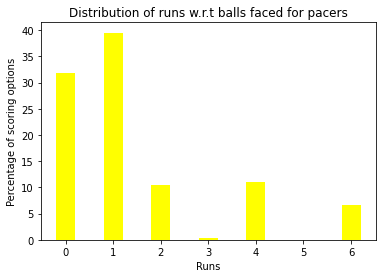

In [101]:
# creating the bar plot for score distribution of pacers only
plt.bar(pace_array, dhoni_pace_dist, color ='yellow',  
        width = 0.4) 
  
plt.xlabel("Runs") 
plt.ylabel("Percentage of scoring options") 
plt.title("Distribution of runs w.r.t balls faced for pacers") 
plt.show() 

In [96]:
dhoni_pace_dist = dhoni_pace_dist.drop(labels=[7])

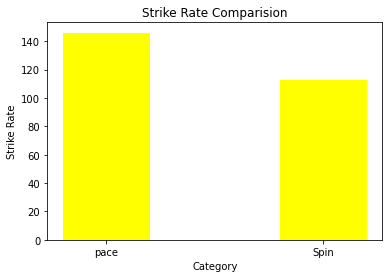

In [112]:
sr_array = pd.Series([strike_rate_against_pace, strike_rate_against_spin])
label = np.array(['pace', 'Spin'])
  
# Creating the bar plot 
plt.bar(label, sr_array, color ='yellow',  width = 0.4) 
  
plt.xlabel("Category") 
plt.ylabel("Strike Rate") 
plt.title("Strike Rate Comparision") 
plt.show() 

In [115]:
bowler_list = ['Bumrah', 'Malinga', 'Boult', 'Steyn', 'M Morkel', 'Narine']
run_bowl, ball_bowl, strikerate_bowl = [], [], []
for bowler in bowler_list:
    filt = (dhoni_df['bowler'].str.contains(bowler))
    bowl_runs = dhoni_df.loc[filt, 'batsman_runs'].sum()
    run_bowl.append(bowl_runs)
    bowl_balls = dhoni_df.loc[filt, 'ball'].size
    ball_bowl.append(bowl_balls)
    # Calculating Strike Rate
    strikerate_bowl.append((bowl_runs/bowl_balls)*100)

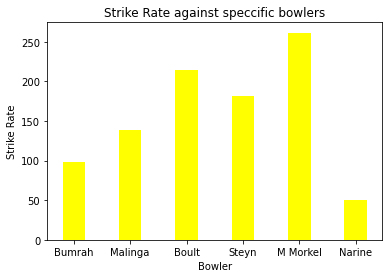

In [118]:
# creating the bar plot 
plt.bar(bowler_list, strikerate_bowl, color ='yellow',  width = 0.4) 
  
plt.xlabel("Bowler") 
plt.ylabel("Strike Rate") 
plt.title("Strike Rate against speccific bowlers") 
plt.show() 

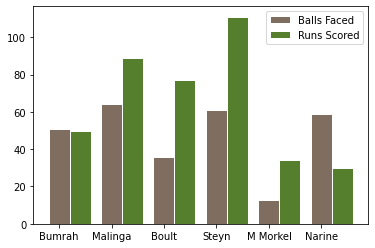

In [147]:
r1 = np.arange(6)
#bowler_name = np.asarray(bowler_list)
fig, ax = plt.subplots()
plt.bar(r1, ball_bowl, color='#7f6d5f', width=0.4, edgecolor='white', label='Balls Faced')
plt.bar(r1+0.4, run_bowl, color='#557f2d', width=0.4, edgecolor='white', label='Runs Scored')
bowler_list = ['', 'Bumrah', 'Malinga', 'Boult', 'Steyn', 'M Morkel', 'Narine']
ax.set_xticklabels(bowler_list)
plt.legend()
plt.show()

In [166]:
teams = ['Mumbai', 'Bangalore', 'Punjab', 'Delhi', 'Kolkata', 'Rajasthan', 'Hyderabad']
team_sr, team_ball, team_run = [], [], []
for team in teams:
    filt = (dhoni_df['bowling_team'].str.contains(team))
    runs = dhoni_df.loc[filt, 'batsman_runs'].sum()
    team_run.append(runs)
    balls = dhoni_df.loc[filt, 'ball'].count()
    team_ball.append(balls)
    strike_rate = (runs/balls)*100
    team_sr.append(strike_rate)

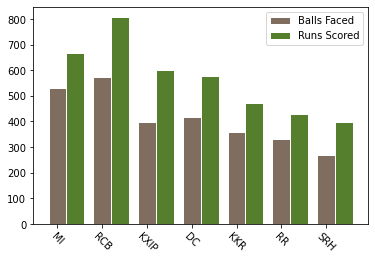

In [187]:
# 
r1 = np.arange(len(teams))
fig, ax = plt.subplots()
plt.bar(r1, team_ball, color='#7f6d5f', width=0.4, edgecolor='white', label='Balls Faced')
plt.bar(r1+0.4, team_run, color='#557f2d', width=0.4, edgecolor='white', label='Runs Scored')
team_list = ['', 'MI', 'RCB', 'KXIP', 'DC', 'KKR', 'RR', 'SRH']

ax.set_xticklabels(team_list)
plt.legend()
plt.xticks(rotation=-45)

ax.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)

plt.show()

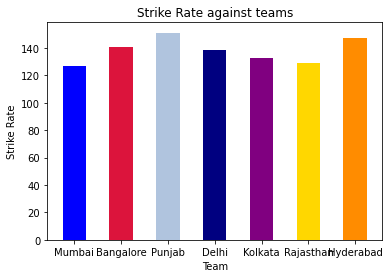

In [185]:
# creating the bar plot for strike rate
plt.bar(teams, team_sr,  width = 0.5, color=('#0000FF', '#DC143C', '#B0C4DE', '#000080', '#800080', '#FFD700', '#FF8C00')) 
  
plt.xlabel("Team") 
plt.ylabel("Strike Rate") 
plt.title("Strike Rate against teams") 
plt.show() 